In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline              

# Формальная постановка

Дан набор обучающих примеров $$(x_1, x_2, \dots, x_n), x_i \in \mathcal{X} \subseteq \mathbb{R}^k,$$ $n$ -- размер выборки, $k$ -- количество признаков (фичей). Также задан (не всегда явно) набор целевых переменных $$(y_1, y_2, \dots, y_n), y_i \in \mathcal{Y} \subseteq \mathbb{R}.$$

Также мы делаем предположение о том, что есть некоторая целевая зависимость
$$f: \mathcal{X} \to \mathcal{Y},$$
$$f(x_i)=y_i \,\,\,\, \forall i=1,\dots, n.$$

Наша задача построить алгоритм
$$a: \mathcal{X} \to \mathcal{Y},$$
который будет приближать исходную зависимость $f$.

Как правило алгоритм мы выбираем из некоторого параметрического семейства функций
$$A = \{a_\theta: \mathcal{X} \to \mathcal{Y}, \theta \in \Theta\}, $$
$$a^* = a_{\theta^*} \in A,$$
$\theta^*$ -- фиксированный набор параметров модели, $\Theta$ -- пространство параметров.

## Метрики качества
Для одной и той же проблемы мы можем найти очень много алгоритмов. Нам нужно как-то понимать, что один лучше другого по качеству (как еще можно сравнивать алгоритмы?).

Для этих целей существуют метрики качества. Они отражают насколько хорошо алгоритм справляется с востановлением целевой зависимости.

## Функция потерь
По своей сути очень близка к метрике качества, тоже показывает насколько хорошо работает алгоритм. Однако отличается от последней тем, что она дифференцируема (и как правило выпуклая) и используется непосредственно для обучения алгоритма.

## Обучение
Заключается в оптимизации (минимизации) функции потерь $L$ (при фиксированном семействе $A$):
$$L: A \times \mathcal{Y} \to \mathbb{R},$$
$$L(a, y) \to \min,$$
$$a^* = \arg\min_{a \in A} L(a,y).$$
Или можно выразить через параметры:
$$\theta^* = \arg\min_{\theta \in \Theta} L(a_\theta, y),$$
$$a^* = a_{\theta^*}.$$
$y$ здесь обозначает набор заданных целевых переменных.

Часто $L(a, y)$ представляют как среднее по отдельным примерам:
$$L(a,y) = \frac{1}{n}\sum_{i=1}^{n} L(a(x_i), y_i)$$

## Подробнее о признаках

Можно разделить на несколько групп:

1) Категориальные (конечное множество значений): пол человека, категория товара;

2) Порядковые (конечное упорядоченное множество): уровень владения языком;

3) Количественные (множество действительных чисел): возраст человека, цена товара.

Как правило нам даны описания объектов, а не их признаки сразу. Например, у веб-страниц у нас есть их залоговок, текст и тд. 

Также иногда модели требуют ограничения на значения признаков. Например, для линейных моделей есть предположение, что признаки нормализованы:
$$x_i \in \mathcal{N}(0, 1).$$

### Нормализация данных

Приведение данных к нормальному распределению:

In [2]:
from sklearn import preprocessing

In [3]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled                               

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [5]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [6]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [7]:
X_test = [[-1., 1., 0.]]

In [8]:
scaler.transform(X_test) 

array([[-2.44948974,  1.22474487, -0.26726124]])

Приведение данных к отрезку [0,1]:

In [9]:
preprocessing.minmax_scale(X_train)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Аналогично есть MinMaxScaler.

Есть инструмент для преобразования распределения:

In [25]:
sample = np.random.randn(1500)

(array([  1.,  18.,  57., 185., 321., 409., 301., 139.,  59.,  10.]),
 array([-3.73416506, -3.04488031, -2.35559556, -1.66631081, -0.97702606,
        -0.28774131,  0.40154344,  1.09082819,  1.78011294,  2.46939769,
         3.15868243]),
 <a list of 10 Patch objects>)

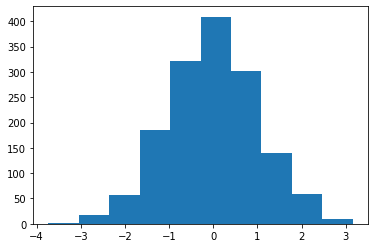

In [26]:
plt.hist(sample)

In [27]:
sample_uniform = preprocessing.QuantileTransformer().fit_transform(sample.reshape(-1, 1))

(array([150., 150., 150., 151., 148., 151., 151., 149., 150., 150.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

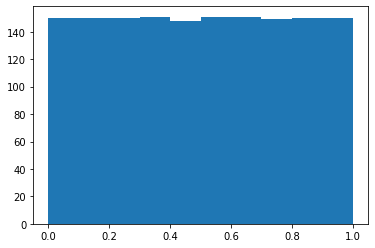

In [28]:
plt.hist(sample_uniform)

Также есть мапинг в нормальное распредление с помощью PowerTransformer.

Также есть инструмент для нормализации в смысле векторной нормы:
$$normalize(p) = \frac{p}{||p||},$$
где $||.||$ -- $l1$, $l2$, $max$ норма.

#### Обработка категориальных признаков

Категориальные признаки обычно нельзя просто так поместить в датасет, тк это как правило строки. Однако, если это числа, то они обычно имеют другой смысл в отличии числовых. Например, если мы женский пол обозначим 0, а мужской 1, то это не значит, что 0 < 1, то есть нет никакого смысла в числовых значениях этих переменных кроме как наличия того или иного пола.

Для такого вида признаков обычно используют технику one-hot.

In [30]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]

In [33]:
preprocessing.OneHotEncoder().fit_transform(X).todense()

matrix([[0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0.]])

Похожий функционал есть в pandas:

In [4]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
df.head()

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [8]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


# Типы задач машинного обучения

![](images_pt1/ml-types.jpeg)

# Обучение с учителем
Целевые переменные (метки) $(y_1, y_2, \dots, y_n)$ нам явно заданы.

## Задача регрессии
Множество $\mathcal{Y}$ континуально, например, предсказываем объем продаж, цену, температуру.

![](images_pt1/regression.png)

### Функции потерь

Mean Squared Error, Средний квадрат ошибки
$$MSE = \frac{1}{n}\sum_{i=1}^n (a(x_i) - y_i)^2.$$
Root Mean Squared Error, Средняя квадратичная ошибка
$$RMSE = \sqrt{MSE}.$$
Mean Absolute Error, Средний модуль отклонения
$$MAE = \frac{1}{n}\sum_{i=1}^n |a(x_i) - y_i|.$$

## Задача классификации
Множество $\mathcal{Y}$ конечно.

Частный случай -- бинарная классификация ($|\mathcal{Y}| = 2$), например, предсказываем будет ли клик, покупка. 

<table><tr>
<td><img src="images_pt1/class1.png" style="height:400px"></td>
<td><img src="images_pt1/class2.png" style="height:400px"></td>
</tr></table>

### Метрики качества

<table><tr>
<td><img src="images_pt1/prec1.png" style="height:400px"></td>
<td><img src="images_pt1/prec2.png" style="height:400px"></td>
</tr></table>

$$Accuracy = \frac{1}{n}\sum_{i=1}^n [a(x_i) = y_i]$$
$$Precision = \sum_{i=1}^n \frac{[a(x_i) = y_i = 1]}{[a(x_i) = 1]}$$
$$Recall = \sum_{i=1}^n \frac{[a(x_i) = y_i = 1]}{[y_i = 1]}$$
$$F1\_score = 2 \cdot \frac{Recall \cdot Precision}{Recall + Precision}$$

Еще важные метрики (но о них на другом занятии): ROC-AUC, PR-AUC.

Одна из основных функций потерь -- Negative Log Loss (бинарная классификация):
$$NLL = \sum_{i=1}^n(\,\,-y_i \cdot \log{a(x_i)} - (1 - y_i) \cdot \log(1 - a(x_i))\,\,)$$

Подробнее о задаче классификации на следующем занятии.

# Обучение без учителя (кратко)
Целевые переменные (метки) $(y_1, y_2, \dots, y_n)$ нам не заданы.

Как правило нужно построить алгоритм, воспроизводящий скрытые закономерности в данных.

## Кластеризация
Необходимо разбить обучающее множество на непересекающиеся классы. Разбиение как правило должно отвечать двум условиям:

1) в одном классе должны находиться похожие объекты;

2) объекты из разных кластеров должны существенно различаться.

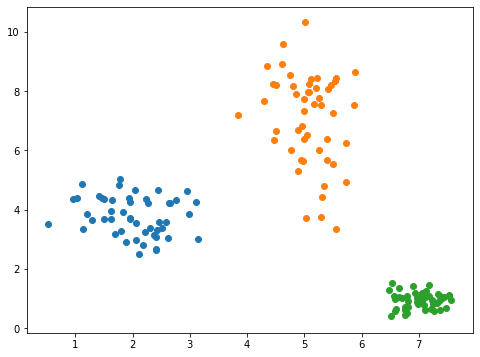

In [39]:
plt.figure(figsize=(8,6))
points = np.random.randn(50,2)*(0.5, 0.7) + (2,4)
plt.scatter(points[:,0], points[:,1])

points = np.random.randn(50,2)*(0.5, 1.3) + (5,7)
plt.scatter(points[:,0], points[:,1])

points = np.random.randn(50,2)*(0.3, 0.3) + (7,1)
plt.scatter(points[:,0], points[:,1])

## Снижение размерности
Пытаемся построить отображение $h: \mathbb{R}^k \to \mathbb{R}^l$, $l \leq k$, с наименьшими потерями информации в данных.

<table><tr>
<td><img src="images_pt1/pca.png" style="height:400px"></td>
<td><img src="images_pt1/isomap.png" style="height:400px"></td>
</tr></table>

## Детекция аномалий
Выделение в данных нетипичных представителей

(Обнаружение мошеннических переводов, вмешательств, поломок)

<table><tr>
<td><img src="images_pt1/anomaly.png" style="height:400px"></td>
</tr></table>

# Обучение модели

## Переобучение и недообучение (overfitting and underfitting).

При обучении модели мы опираемся на значения функции потерь: чем меньше потери -- тем лучше?
На самом деле не всегда:

![](images_pt1/overfit.png)

Мы можем столкнуться с переобучением -- это обычно происходит, когда параметров модели сильно больше, чем обучающих примеров. Модель просто запоминает тренировочные данные и неспособна давать адекватные предсказания на новых данных (плохо обобщаема).

Может быть и обратная ситуация: параметров модели недостаточно для того, что выучить паттерны в данных. Такой случай называется недообучением.

## Регуляризация

Для того, чтобы избежать переобучения мы к нашей функции потерь добавляем дополнительный член, зависящий от параметров модели:
$$L_{reg}(a, y) = L(a, y) + R(\theta).$$

Обычно используют $l_p$ регуляризацию с $p=1,2$:
$$R(\theta) = l_p(\theta) = \lambda ||\theta||_p.$$

Еще комбинированный вариант, Elastic Net Regularization:
$$R(\theta) = \lambda_1 l_1(\theta) + \lambda_2 l_2(\theta).$$

$\lambda$ -- сила регуляризации.

Обоснование регуляризации можно получить с помощью вероятностного подхода. Если мы предположим, что параметры имеют некоторое априорное распределение, то выводя лосс через метод максимального правдоподобия получим дополнительный регуляризационный член. При этом его вид зависит от априорного распределения ($l_2$ для нормального, $l_1$ для лапласа).

Подробности: http://bjlkeng.github.io/posts/probabilistic-interpretation-of-regularization/

![](images_pt1/two_normal.png)

## Валидация

Для того, чтобы избежать переобучения и честно оценивать качество модели, обучающаю выборку делят на две: на одной части мы будем обучать наш алгоритм, а на другой валидироваться.

In [40]:
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [44]:
list(y)

[0, 1, 2, 3, 4]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [42]:
y_train

[2, 0, 3]

In [46]:
X_test

array([[2, 3],
       [8, 9]])

In [47]:
y_test

[1, 4]

In [48]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)  

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


Для подбора моделей перебором гиперпараметров можно использовать GridSearchCV, RandomizedSearchCV

# Методы оптимизации

<table><tr>
<td><img src="images_pt1/sgd1.png" style="height:400px"></td>
</tr></table>

В методах машинного обучения используется метод градиентного спуска и всевозможные его вариации, о которых мы сейчас и поговорим.

Базовая формула обычного градиентного спуска для обновления весов выглядит следующим образом:
$$\theta = \theta - \eta \cdot \nabla_\theta L(\theta),$$
$\theta$ -- введеные ранее параметры модели, $\eta$ -- скорость обучения (learning rate), $\nabla_\theta L(\theta)$ -- градиент нашей функции потерь по параметрам $\theta$.

Важным предположением в задачах МО является то, что градиент является аддитивной функцией относительно обучающих примеров, т.е.:
$$\nabla_\theta L(\theta) = \sum_{i=1}^n \nabla_\theta L_i(\theta) = \sum_{i=1}^n \nabla_\theta L(a_\theta(x_i), y_i)$$

Следствием последнего утверждения являются алгоритмы SGD (Stochastic Gradient Descent) и Mini-batch SGD. Они позволяют обновлять параметры не перебирая весь набор примеров, который может быть очень большим.

## Стохастический градиентный спуск

```{python}
1.function sgd(X, alpha, epsilon):

2. 	initialise beta 

3. 	do: 

4.        X = shuffle(X)

5.        for x in X:

6.            theta = new_theta

7.            new_theta = theta - alpha*grad(x, theta)

8.	until dist(new_theta, theta) < epsilon

9.	return beta
```

## Mini-batch SGD

```{python}
1.function sgd_mb(X, alpha, epsilon, batch_size):

2. 	initialise beta 

3. 	do: 

4.        X_batch = get_next_batch(X, batch_size)

5.        theta = new_theta

6.        new_theta = theta - alpha*grad(X_batch, theta)

7.	until dist(new_theta, theta) < epsilon

8.	return beta
```

### Nesterov Accelerated Gradient
Учитываем в скорости спуска насколько долго мы движемся в данном направлении.
$$v_t = \gamma v_{t-1} + \eta \nabla_\theta L(\theta - \gamma v_{t-1}),$$
$$\theta = \theta - v_t.$$

### Adagrad
Признаки могут нести в себе разное количество информации: какие-то могут встречаться часто, но при этом быть мало связаны с целевой переменной, другие напротив могут встречаться не так часто, но при этом могут быть тесно связаны с таргетом. Хотелось бы учитывать частоту обновления для каждого признака.

$$g_t \equiv \nabla_\theta L( \theta_t ),$$
$$G_{t} = G_{t} + g_{t}^2,$$
$$\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{G_{t} + \epsilon}} g_{t}.$$

## Adadelta
В Adagrad после некоторого момента вес признака может перестать обновляться совсем, эту проблему в Adadelta (и его предшественнике RMSPROP) решают с помощью скользящего среднего для обновлений.

Обозначения:
$$E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g^2_t,$$

$$RMS[g]_t = \sqrt{E[g^2]_t + \epsilon}.$$

Обновление параметров модели:

$$\Delta \theta = -\frac{RMS[\Delta \theta]_{t-1}}{RMS[g]_{t}}g_{t},$$

$$\theta_{t+1} = \theta_{t} - \frac{RMS[\Delta \theta]_{t-1}}{RMS[g]_{t}}g_{t}.$$

Обновление аккумулирующих переменных:

$$E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1} + (1 - \gamma) \Delta \theta^2_t,$$

$$RMS[\Delta \theta]_{t} = \sqrt{E[\Delta \theta^2]_t + \epsilon}.$$

## Adam
Сочетает в себе идеи NAG и Adadelta, но с некоторыми поправками.

Накопление импульса наподобие NAG:
$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t.$$

Скользящее среднее для частоты обновления:
$$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2.$$

Поправка для избавления от подбора начальной инилизации $m_t$ и $v_t$:
$$\hat{m}_t = \frac{m_t}{1 - \beta^t_1},$$
$$\hat{v}_t = \frac{v_t}{1 - \beta^t_2}.$$

Итоговая формула для обновления весов:
$$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t + \epsilon}} \hat{m}_t.$$

![](images_pt1/optim.gif)

Подробнее об этих методах и еще парочке других: https://habr.com/ru/post/318970/.

# Итоги

Построение модели машинного обучения состоит из трех компонент:

1) Выдвигаем гипотезу о модели -- семейства параметрических функций A, которая может решить нашу задачу.

2) Выбираем критерий, на основании которого будем оценивать качество модели.

3) Подбираем наилучшие параметры модели с помощью алгоритма оптимизации.